In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# import torch
# import torch.nn as nn
# from utils import calc_stable_rank

data = pd.read_json('stable_rank_data_perhead.json')
data.keys()

Index(['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5', 'layer 6',
       'layer 7', 'layer 8', 'layer 9', 'layer 10', 'layer 11', 'layer 12',
       'layer 13', 'layer 14', 'layer 15', 'layer 16', 'layer 17', 'layer 18',
       'layer 19', 'layer 20', 'layer 21', 'layer 22', 'layer 23', 'layer 24'],
      dtype='object')

In [14]:
for layer in data.keys():
    for W in data[layer].keys():
        SRs = [round(data[layer][W][head]['stable_rank'], 2) for head in data[layer][W].keys()]
        print(f'{layer},{W}: avg={round(sum(SRs)/len(SRs),2)} <- {SRs}')
    print('\n')
    

layer 1,Wq: avg=16.38<-[24.48, 35.05, 18.64, 14.95, 12.83, 28.76, 12.24, 22.54, 14.18, 15.5, 13.56, 11.9, 12.51, 14.62, 21.74, 7.47, 21.22, 16.3, 12.93, 14.68, 12.21, 12.22, 19.17, 21.74, 12.74, 18.93, 15.18, 16.58, 8.37, 15.26, 14.39, 11.31]
layer 1,Wk: avg=14.42<-[20.43, 27.77, 10.47, 20.25, 11.54, 18.7, 13.29, 17.43, 16.48, 15.05, 13.14, 10.73, 13.77, 9.18, 25.82, 6.91, 24.22, 13.74, 10.29, 14.64, 11.52, 9.06, 14.51, 17.99, 3.63, 24.98, 12.94, 15.09, 7.59, 7.44, 11.75, 11.14]
layer 1,Wv: avg=37.75<-[54.18, 49.0, 36.03, 45.37, 11.77, 38.69, 46.07, 51.48, 36.02, 48.11, 38.63, 41.79, 48.67, 16.39, 43.35, 9.69, 47.04, 39.49, 48.53, 50.82, 43.74, 45.18, 48.59, 28.82, 32.94, 27.46, 45.43, 44.04, 9.37, 45.7, 23.67, 11.85]
layer 1,WqWkT: avg=3.52<-[4.61, 3.9, 2.54, 2.11, 2.59, 8.27, 3.62, 4.74, 3.3, 4.45, 3.93, 3.25, 2.51, 2.53, 3.48, 1.61, 2.22, 2.77, 2.07, 4.16, 2.87, 1.21, 2.84, 3.77, 1.19, 14.29, 3.94, 3.45, 2.23, 1.73, 3.43, 3.03]


layer 2,Wq: avg=23.36<-[25.5, 21.48, 25.6, 26.49, 20.

In [21]:
# Wq_avgs, Wk_avgs, Wv_avgs, WqWkT_avgs = [], [], [], []
SR_averages = {W:[] for W in data['layer 1'].keys()}

for layer in data.keys(): 
    for W in data[layer].keys():
        SRs = [round(data[layer][W][head]['stable_rank'], 2) for head in data[layer][W].keys()]
        Wavg = round(sum(SRs)/len(SRs),2)
        SR_averages[W].append(Wavg)

SR_averages



{'Wq': [16.38,
  23.36,
  25.04,
  23.43,
  22.39,
  25.35,
  25.23,
  24.5,
  22.84,
  22.63,
  22.53,
  21.67,
  21.34,
  20.56,
  20.54,
  18.96,
  18.32,
  18.32,
  16.15,
  14.62,
  16.69,
  14.8,
  7.27,
  1.87],
 'Wk': [14.42,
  19.11,
  21.84,
  20.98,
  21.07,
  23.43,
  22.14,
  22.69,
  20.77,
  19.86,
  20.48,
  19.71,
  20.55,
  19.26,
  20.09,
  19.53,
  20.05,
  20.13,
  17.22,
  16.29,
  16.07,
  14.49,
  10.59,
  4.73],
 'Wv': [37.75,
  39.09,
  37.81,
  33.18,
  37.21,
  36.27,
  34.37,
  33.75,
  37.01,
  38.14,
  37.3,
  35.67,
  36.88,
  38.9,
  39.57,
  39.36,
  39.96,
  38.88,
  40.0,
  38.33,
  42.16,
  41.6,
  42.69,
  39.73],
 'WqWkT': [3.52,
  4.26,
  5.97,
  7.76,
  6.24,
  8.74,
  7.12,
  7.49,
  7.06,
  5.93,
  4.8,
  3.94,
  5.45,
  4.02,
  4.31,
  4.4,
  4.31,
  4.0,
  3.24,
  3.4,
  3.5,
  3.01,
  2.57,
  1.6]}

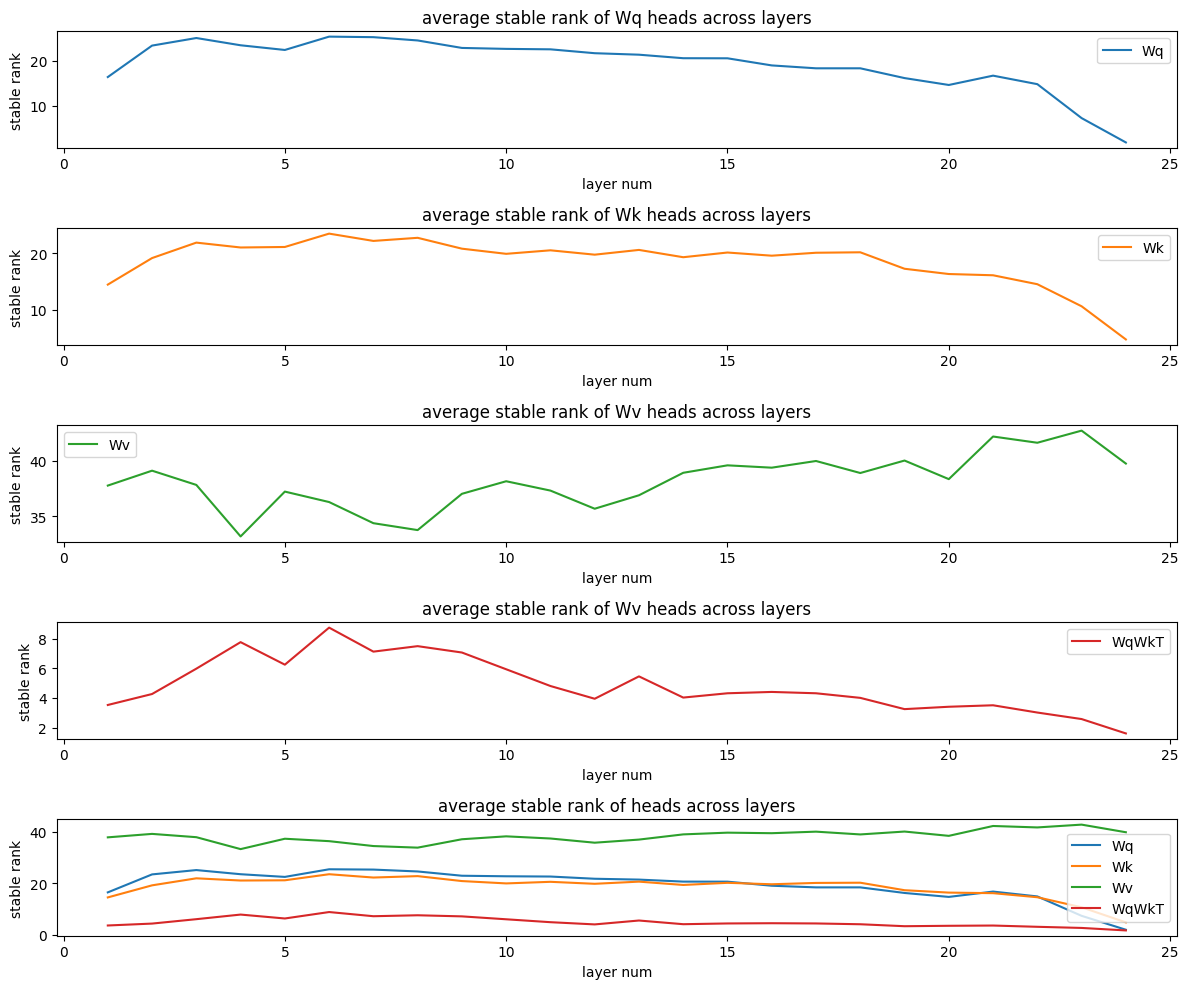

In [24]:
# plots:
layer_nums = [i+1 for i in range(24)]
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12,10))
blue, orange, green, red = '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'
axes[0].set(title='average stable rank of Wq heads across layers', xlabel='layer num', ylabel='stable rank')
axes[0].plot(layer_nums, SR_averages['Wq'], label='Wq', c=blue)
axes[0].legend()

axes[1].set(title='average stable rank of Wk heads across layers', xlabel='layer num', ylabel='stable rank')
axes[1].plot(layer_nums, SR_averages['Wk'], label='Wk', c=orange)
axes[1].legend()

axes[2].set(title='average stable rank of Wv heads across layers', xlabel='layer num', ylabel='stable rank')
axes[2].plot(layer_nums, SR_averages['Wv'], label='Wv', c=green)
axes[2].legend()

axes[3].set(title='average stable rank of Wv heads across layers', xlabel='layer num', ylabel='stable rank')
axes[3].plot(layer_nums, SR_averages['WqWkT'], label='WqWkT', c=red)
axes[3].legend()

axes[4].set(title='average stable rank of heads across layers', xlabel='layer num', ylabel='stable rank')
axes[4].plot(layer_nums, SR_averages['Wq'], label='Wq', c=blue)
axes[4].plot(layer_nums, SR_averages['Wk'], label='Wk', c=orange)
axes[4].plot(layer_nums, SR_averages['Wv'], label='Wv', c=green)
axes[4].plot(layer_nums, SR_averages['WqWkT'], label='WqWkT', c=red)
axes[4].legend()

plt.tight_layout()